## Step 0 — VS Code kernel sanity check


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hmf import MassFunction

## 1. The Halo Mass Function (HMF)

The **halo mass function (HMF)** describes the abundance of dark matter halos as a function of their mass and redshift:

$
\frac{dn}{dM_h}(M_h, z)
$

It gives the **comoving number density of halos** per unit halo mass.  
Dark matter halos are the sites where gas virializes, cools, and eventually forms stars and galaxies. Therefore, understanding the HMF and its evolution from the Big Bang to the present day is essential for understanding how galaxies are distributed across cosmic time.

In this exercise, you will compute and plot the HMF and study its redshift evolution using the `hmf` Python package, which implements commonly used fitting functions calibrated on N-body simulations.
You will use the `MassFunction` class:  
https://hmf.readthedocs.io/en/latest/_autosummary/hmf/hmf.mass_function.hmf.MassFunction.html

When initializing the mass function, you can specify several parameters, among which:
- the **redshift** `z`,
- a **halo mass range** `Mmin` and `Mmax`(e.g. from $10^7$ to $10^{13}\,M_\odot$),
- a **mass resolution** (e.g. `dlog10m = 0.05`),
- the **cosmological parameters** (use a flat $\rm \Lambda CDM$ cosmology)

---

### Exercise and questions

1. Using the `MassFunction` class, compute the halo mass function at different redshifts (e.g. \(z = 0, 2, 6, 10, 14\)).  

2. Plot the **comoving number density** of halos as a function of halo mass ($M_h$) at each redshift.

> **Tips:**
>
> Useful attributes of the `MassFunction` object include:
>
> - `m`, which gives the halo mass array in units of  $h^{-1}\,M_\odot$
> - `dndm`, which gives   $\frac{dn}{dM_h}$ in units of   $h^4\,\mathrm{Mpc^{-3}\,M_\odot^{-1}}$
> - `dndlog10m`, which gives $\frac{dn}{d\log_{10} M_h}$ in units of $h^3\,\mathrm{Mpc^{-3}}$
>
> The factor $h \equiv H_0 / (100\,\mathrm{km\,s^{-1}\,Mpc^{-1}})$ is the dimensionless Hubble parameter. If you want to plot the HMF in **physical units** load the attribute `cosmo.h` and multiply or divide by it accordingly (for example convert masses to $M_\odot$ by dividing by $h$)
>
> Plot several redshifts on the same figure to visualize how the HMF evolves
> with cosmic time.
>
> Use logarithmic axes for both mass and number density as both quantities span several order of magnitudes.


3. Which halos are the most abundant at all redshifts, high or low mass ones?

4. Is the evolution stronger for low-mass or high-mass halos? Why?

5. Consider the dark matter halo of the Milky Way ($M_h \sim 10^{12}\,M_\odot$):
   - Is it a common halo in the local universe? How much more common are dwarf-galaxy halos, such as Small Magellanic Cloud (SMC) - like halos ($M_h \sim 10^{10}\,M_\odot$)?
   - Assuming halos are uniformely distributed, estimate the typical spatial separation between two MW-like halos and two SMC like halos.
   - Repeat the comparison between Milky Way and SMC-like halos at high redshift ($z=15$). How does their relative abundance change, and why?
   - JWST can detect galaxies up to $z \sim 15$. Consider a wide JWST survey probing a comoving volume of $\sim \rm 10^6 cMpc^3$ at this redshift. Do we expect to observe many MW mass halos?
> It is not important to compute the exact numbers; you can also estimate the number densities from the HMF plot. The important point is to understand the order of magnitude, relative abundances, and physical meaning.


## 1) Compute & plot the HMF (Q1–Q2)
### Cell A — compute HMF grids

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hmf import MassFunction

zs = [0, 2, 6, 10, 14]
Mmin, Mmax, dlog10m = 7, 13, 0.05   # in log10(h^-1 Msun)

mfs = {}
for z in zs:
    mf = MassFunction(z=z, Mmin=Mmin, Mmax=Mmax, dlog10m=dlog10m)
    mfs[z] = mf

# show units / h
mf0 = mfs[0]
h = mf0.cosmo.h
print("h =", h)
print("m is in h^-1 Msun; dndlog10m in h^3 Mpc^-3 (per notebook tips)")

/Users/alberto/miniforge3/envs/galaxy_course/lib/python3.11/site-packages/hmf/density_field/transfer_models.py:232: UserWarning: 'extrapolate_with_eh' was not set. Defaulting to True, which is different behaviour than versions <=3.4.4. This warning may be removed in v4.0. Silence it by setting extrapolate_with_eh explicitly.
  warnings.warn(


h = 0.6766
m is in h^-1 Msun; dndlog10m in h^3 Mpc^-3 (per notebook tips)


### Cell B — plot dn/d\log_{10}M_h vs M_h


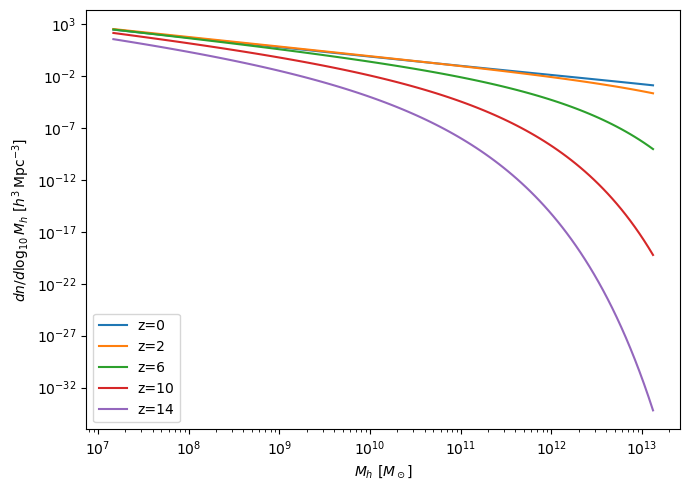

In [3]:
plt.figure(figsize=(7,5))
for z in zs:
    mf = mfs[z]
    Mh_phys = mf.m / h              # convert h^-1 Msun -> Msun
    plt.plot(Mh_phys, mf.dndlog10m, label=f"z={z}")

plt.xscale("log"); plt.yscale("log")
plt.xlabel(r"$M_h\ [M_\odot]$")
plt.ylabel(r"$dn/d\log_{10}M_h\ [h^3\,\mathrm{Mpc^{-3}}]$")
plt.legend()
plt.tight_layout()
plt.show()

### Cell C - Q5 — MW vs SMC halo abundances, separations, and expected counts at z=15


In [4]:
# Q5 — MW vs SMC halo abundances, separations, and expected counts at z=15

import numpy as np
from hmf import MassFunction

# ---- Settings (match what you used above) ----
Mmin, Mmax, dlog10m = 7, 13, 0.05   # log10(h^-1 Msun) range/resolution

# Build a reference MF to get h (cosmology)
mf_ref = MassFunction(z=0, Mmin=Mmin, Mmax=Mmax, dlog10m=dlog10m)
h = mf_ref.cosmo.h
print("h =", h)

# ---- Helper functions ----
def dn_dlogM_at(mf, M_target_Msun):
    """
    Interpolate dn/dlog10M at a target *physical* halo mass [Msun].
    mf.m is in h^-1 Msun, so convert to physical Msun by dividing by h.
    Returns dn/dlog10M in units of h^3 Mpc^-3 (as provided by hmf).
    """
    Mh_phys = mf.m / h
    return np.interp(np.log10(M_target_Msun), np.log10(Mh_phys), mf.dndlog10m)

def typical_sep_from_n(n_h3):
    """
    Typical separation assuming uniform distribution:
        d ~ n^(-1/3)
    If n is in h^3 Mpc^-3, then d is in (Mpc/h).
    """
    return n_h3 ** (-1/3)

# ---- Targets ----
M_MW  = 1e12  # Msun
M_SMC = 1e10  # Msun

# ---- Compute at z=0 and z=15 ----
for z in [0, 15]:
    mf = MassFunction(z=z, Mmin=Mmin, Mmax=Mmax, dlog10m=dlog10m)

    n_MW  = dn_dlogM_at(mf, M_MW)
    n_SMC = dn_dlogM_at(mf, M_SMC)
    ratio = n_SMC / n_MW

    d_MW  = typical_sep_from_n(n_MW)   # (Mpc/h)
    d_SMC = typical_sep_from_n(n_SMC)  # (Mpc/h)

    print(f"\n=== z = {z} ===")
    print(f"dn/dlog10M at MW  (1e12 Msun): {n_MW:.3e}  [h^3 Mpc^-3]")
    print(f"dn/dlog10M at SMC (1e10 Msun): {n_SMC:.3e}  [h^3 Mpc^-3]")
    print(f"Ratio SMC/MW:                 {ratio:.3e}")
    print(f"Typical sep MW:               {d_MW:.2f}  (Mpc/h)")
    print(f"Typical sep SMC:              {d_SMC:.2f}  (Mpc/h)")
    print(f"Typical sep MW (physical):    {d_MW/h:.2f}  Mpc")
    print(f"Typical sep SMC (physical):   {d_SMC/h:.2f}  Mpc")

# ---- JWST survey volume question at z=15 ----
# Volume given in the prompt: 1e6 comoving Mpc^3
V_cMpc3 = 1e6

mf15 = MassFunction(z=15, Mmin=Mmin, Mmax=Mmax, dlog10m=dlog10m)
n_MW_z15 = dn_dlogM_at(mf15, M_MW)

# Expected number ~ n * V (order of magnitude).
# Note: n is in h^3 Mpc^-3; multiplying by V in Mpc^3 gives N in h^3.
# For order-of-mag you can treat h^3 ~ O(1); if you want physical, multiply by h^3 explicitly.
Nexp_h3 = n_MW_z15 * V_cMpc3
Nexp_phys = (n_MW_z15 * h**3) * V_cMpc3  # convert number density to Mpc^-3 before multiplying

print("\n=== JWST volume estimate at z=15 ===")
print(f"Assuming V = {V_cMpc3:.1e} cMpc^3")
print(f"dn/dlog10M at MW (z=15): {n_MW_z15:.3e} [h^3 Mpc^-3]")
print(f"Expected MW halos (order-of-mag, ~h^3): {Nexp_h3:.3e}")
print(f"Expected MW halos (physical density):   {Nexp_phys:.3e}")

h = 0.6766

=== z = 0 ===
dn/dlog10M at MW  (1e12 Msun): 1.356e-02  [h^3 Mpc^-3]
dn/dlog10M at SMC (1e10 Msun): 8.031e-01  [h^3 Mpc^-3]
Ratio SMC/MW:                 5.921e+01
Typical sep MW:               4.19  (Mpc/h)
Typical sep SMC:              1.08  (Mpc/h)
Typical sep MW (physical):    6.20  Mpc
Typical sep SMC (physical):   1.59  Mpc

=== z = 15 ===
dn/dlog10M at MW  (1e12 Msun): 6.878e-18  [h^3 Mpc^-3]
dn/dlog10M at SMC (1e10 Msun): 2.459e-05  [h^3 Mpc^-3]
Ratio SMC/MW:                 3.576e+12
Typical sep MW:               525834.99  (Mpc/h)
Typical sep SMC:              34.39  (Mpc/h)
Typical sep MW (physical):    777172.61  Mpc
Typical sep SMC (physical):   50.82  Mpc

=== JWST volume estimate at z=15 ===
Assuming V = 1.0e+06 cMpc^3
dn/dlog10M at MW (z=15): 6.878e-18 [h^3 Mpc^-3]
Expected MW halos (order-of-mag, ~h^3): 6.878e-12
Expected MW halos (physical density):   2.130e-12


## 2. Star Formation in Dark Matter Halos

Dark matter halos grow over cosmic time through mergers and smooth accretion driven by gravity. As DM halos virialize, baryons fall in their potential wells alongside the dark matter. This gas can cool and eventually form stars. It is therefore fundamental to understand how this process happens and the connection between galaxies and their dark matter halos.

In this exercise, we aim to build a **simple, physically motivated analytical model** that connects the growth of dark matter halos to the star formation of the galaxies they host.

At any given time, star formation in a halo is regulated by two key factors: **how fast the halo is growing**, which determines how much fresh gas is being accreted, and **how efficiently the accreted gas can be converted into stars**, which depends on several physical processes.
Following these ideas, we can express the star formation rate (defined as $\mathrm{SFR}=dM_\star/dt$) of a galaxy hosted by a halo of mass $M_h$ at redshift $z$ as proportional to:
- the **halo mass accretion rate** $\dot{M}_h$, describing how fast the halo grows;
- the **instantaneous star formation efficiency** $\epsilon_{\mathrm{\star, inst}}(M_h)$, which describe how gas is transformed into stars and encapsulated the effects of cooling, feedback processes, and star formation physics.

---

### Exercise and questions

1. Implement a function for the halo mass accretion rate $\dot{M}_h(M_h, z)$. Do dark matter halos grow more rapidly at early or late cosmic times?
2. Implement a function for the instantaneous star formation efficiency $\epsilon_{\star, \mathrm{inst}}(M_h)$.
> Use the provided parametric form with the following parameters:\
>$\epsilon_0 = 0.18$\
$Mc = 10^{11.64} M_\odot$\
$a = 0.69$\
$b = 0.65$
3. Plot $\epsilon_{\star, \mathrm{inst}}$ as a function of halo mass over a wide range (e.g. $10^6$-$10^{14}\,M_\odot$). Which halos form stars most efficiently?
5. What physical processes suppress star formation at the low-mass end and at the high-mass end?
6. Implement a function that computes $\mathrm{SFR}(M_h,z)$.
7. Consider a halo of mass $M_h=10^{10}\,M_\odot$: does it form more stars at $z=5$ or at $z=15$? What is driving this difference?



### Q1 — Implement \dot M_h(M_h,z). Do halos grow faster early or late?


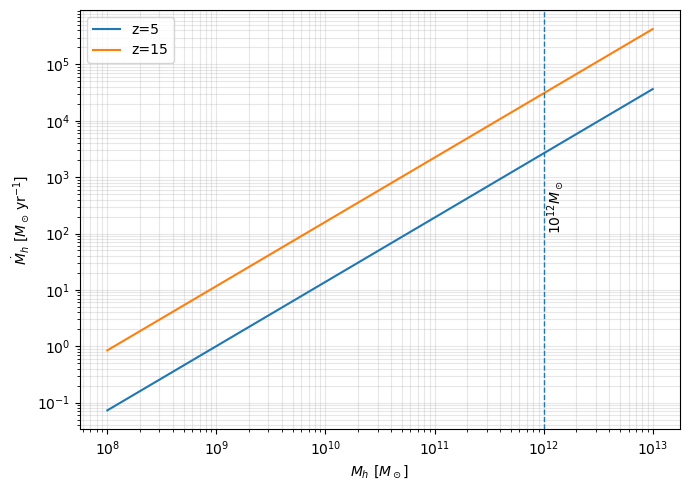

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def Mhdot(Mh, z):
    """
    Halo mass accretion rate dMh/dt in Msun/yr.
    (Dekel+23 parameterization from the slides)
    """
    Mh = np.asarray(Mh, dtype=float)
    return 0.03e-9 * Mh * (Mh/1e12)**0.14 * (1 + z)**2.5

Mh_grid = np.logspace(8, 13, 500)

plt.figure(figsize=(7,5))
for z in [5, 15]:
    plt.loglog(Mh_grid, Mhdot(Mh_grid, z), label=f"z={z}")

# --- ADD THIS ---
plt.axvline(1e12, ls="--", lw=1)
plt.text(1.05e12, 1e2, r"$10^{12} M_\odot$", rotation=90, va="bottom")
# -----------------

plt.xlabel(r"$M_h\ [M_\odot]$")
plt.ylabel(r"$\dot{M}_h\ [M_\odot\,\mathrm{yr}^{-1}]$")
plt.legend()
plt.grid(True, which="both", alpha=0.3)
plt.tight_layout()
plt.show()

### Q2 + Q3 — Implement \epsilon_{\star,\mathrm{inst}}(M_h) and plot it. Which halos are most efficient?


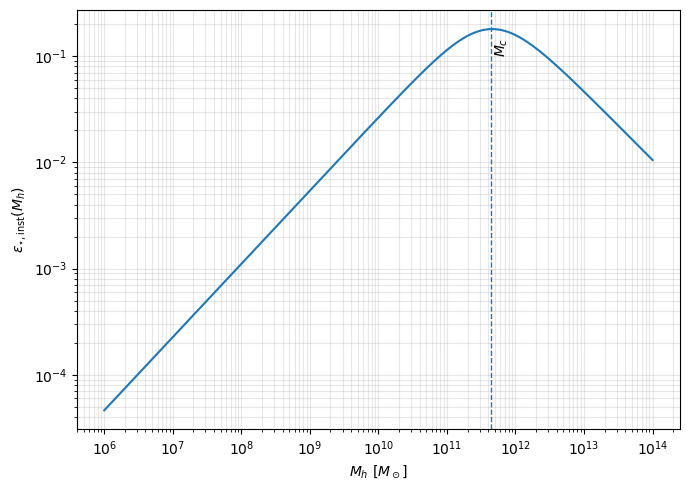

In [16]:
def eps_inst(Mh, eps0=0.18, Mc=10**11.64, a=0.69, b=0.65):
    """
    Instantaneous star formation efficiency (dimensionless).
    Mh in Msun.
    """
    Mh = np.asarray(Mh, dtype=float)
    x = Mh / Mc
    return (2.0 * eps0) / (x**(-a) + x**(b))

# Plot
import matplotlib.pyplot as plt

Mh_grid = np.logspace(6, 14, 500)
eps_grid = eps_inst(Mh_grid)

plt.figure(figsize=(7,5))
plt.loglog(Mh_grid, eps_grid)

Mc = 10**11.64

plt.axvline(Mc, ls="--", lw=1)
plt.text(Mc*1.1, 0.15, r"$M_c$", rotation=90, va="top")
plt.xlabel(r"$M_h\ [M_\odot]$")
plt.ylabel(r"$\epsilon_{\star,\mathrm{inst}}(M_h)$")
plt.grid(True, which="both", alpha=0.3)
plt.tight_layout()
plt.show()

### Q5. Implement SFR and plot it (SFR vs M_h at z=5 and z=15)

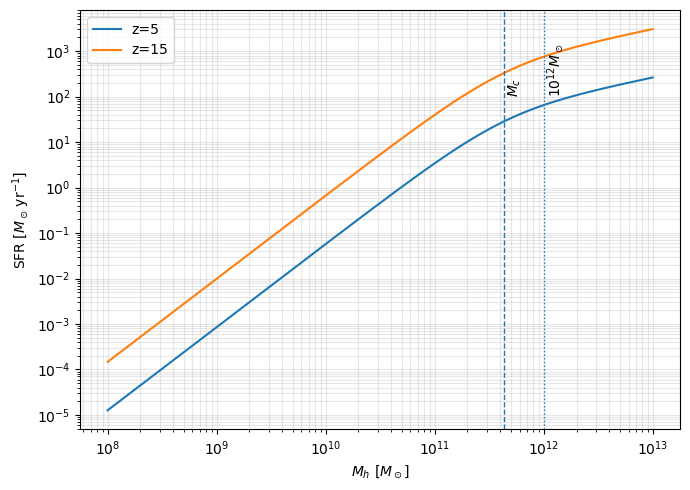

In [17]:
def SFR(Mh, z, fb=0.156):   # fb ~ Omega_b/Omega_m
    """
    Star formation rate in Msun/yr.
    """
    return fb * eps_inst(Mh) * Mhdot(Mh, z)

Mh_grid = np.logspace(8, 13, 500)

plt.figure(figsize=(7,5))
for z in [5, 15]:
    plt.loglog(Mh_grid, SFR(Mh_grid, z), label=f"z={z}")
plt.axvline(Mc, ls="--", lw=1)
plt.axvline(1e12, ls=":", lw=1)
plt.text(Mc*1.05, 1e2, r"$M_c$", rotation=90, va="bottom")
plt.text(1.05e12, 1e2, r"$10^{12} M_\odot$", rotation=90, va="bottom")
plt.xlabel(r"$M_h\ [M_\odot]$")
plt.ylabel(r"$\mathrm{SFR}\ [M_\odot\,\mathrm{yr}^{-1}]$")
plt.legend()
plt.grid(True, which="both", alpha=0.3)
plt.tight_layout()
plt.show()


### Q6. For M_h=10^{10} M_\odot: more stars at z=5 or z=15? Why?

In [13]:
Mh_test = 1e10
sfr5  = SFR(Mh_test, 5)
sfr15 = SFR(Mh_test, 15)

print(f"SFR(Mh=1e10 Msun, z=5 )  = {sfr5:.4e} Msun/yr")
print(f"SFR(Mh=1e10 Msun, z=15)  = {sfr15:.4e} Msun/yr")
print(f"Ratio (z=15 / z=5)       = {sfr15/sfr5:.3f}")

SFR(Mh=1e10 Msun, z=5 )  = 5.7224e-02 Msun/yr
SFR(Mh=1e10 Msun, z=15)  = 6.6451e-01 Msun/yr
Ratio (z=15 / z=5)       = 11.612


## 3. The Luminosity Function: Theoretical Predictions

### 3.1 The UV emission of star forming galaxies

So far, we have described how **galaxies form stars inside dark matter halos** at different cosmic epochs. However, galaxies are not observed through their dark matter halos, but through the **light** they emit. The next key step is therefore to connect the **star formation rate (SFR)** of galaxies to their **observable ultra-violet (UV) emission**.

Young, massive stars dominate the rest-frame UV light of galaxies, and the UV luminosity can be approximated as:
$ L_{\mathrm{UV}} = \frac{\mathrm{SFR}}{c_{\mathrm{UV}}} $

where $ c_{\mathrm{UV}} $ is a conversion factor that depends on the assumed initial mass function and stellar population model (see e.g. Madau & Dickinson 2014).

>Tip:\
>The UV luminosity can then be converted into an **absolute UV magnitude** (AB system) via: \
>$ M_{\mathrm{UV}} = 51.63 - 2.5 \log_{10}(L_{\mathrm{UV}}/(\rm erg \, s^{-1} {Hz}^{-1}))$

Using this parametrization together with the star formation model developed in Part 2, we can build a direct relation between **dark matter halo mass** and **UV luminosity**. In this part, you will derive and explore this relation.

### 3.2 From HMF to UVLF

In Part 1, we studied the **halo mass function (HMF)**, which describes how many dark matter halos exist at a given mass and redshift. Observationally, however, we cannot measure directly the distribution of dark matter halos. What we measure is the distribution of galaxies as a function of their UV luminosity.

The most commonly used statistical descriptor of galaxy populations is therefore the **UV luminosity function (UVLF)**, defined as:

$
\phi(M_{\mathrm{UV}}, z) = \frac{dn}{dM_{\mathrm{UV}}}
$

which gives the **comoving number density of galaxies per unit UV magnitude**.

Using the halo mass–UV magnitude relation derived above, we can map the HMF into the UVLF through a change of variables:

$
\phi(M_{\mathrm{UV}}, z) =
\frac{dn}{d\log_{10} M_h}
\left|\frac{d\log_{10} M_h}{dM_{\mathrm{UV}}}\right|
$

This will provide a **testable prediction** for the UV luminosity function at different redshifts based on our simple physical model.

---

### Exercise and Questions

1. Implement a function that computes the UV magnitude $M_{\mathrm{UV}}$ of a galaxy from its star formation rate.
2. Building on the functions of Part 2, implement a function that computes the **UV magnitude** as a function of the halo mass $M_h$ and redshift $z$.
3. Plot the **$ M_{\mathrm{UV}} - M_h $** relation at $z = 5, 10, 15 $.
   - Are halos of fixed mass more or less luminous at earlier cosmic times?
   - What physical ingredient of the model drives this behavior?
4. Implement a function that computes the **UV luminosity function** $\phi(M_{\mathrm{UV}}, z) $.
5. Plot the UV luminosity function at different redshifts (from 0 to 15) in the same plot.

6. Describe the key trends you observe:
   - How does the normalization of the UVLF change with redshift?
   - How does the faint-end slope appear to evolve?
   - At what magnitude does the UVLF "turn over" (if at all)?

7. Discuss: Why does the UVLF shift to lower number densities at higher redshift? What physical processes drive this evolution?


### Q1+Q2+Q3. 

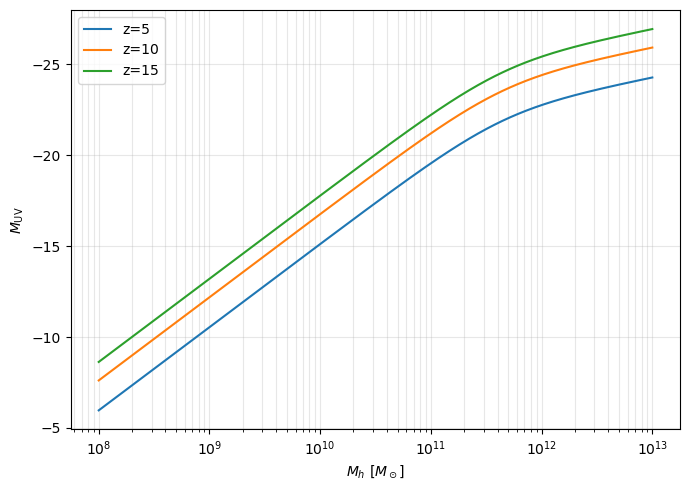

In [18]:
import numpy as np

K_UV = 1.15e-28  # SFR = K_UV * L_UV  -> L_UV = SFR / K_UV

def Muv_from_SFR(sfr, K_UV=K_UV):
    """
    Convert SFR [Msun/yr] to absolute UV magnitude (AB).
    """
    sfr = np.asarray(sfr, dtype=float)
    Luv = sfr / K_UV  # erg/s/Hz
    return 51.63 - 2.5*np.log10(Luv)


def Muv_from_Mh(Mh, z):
    return Muv_from_SFR(SFR(Mh, z))


import matplotlib.pyplot as plt

Mh_grid = np.logspace(8, 13, 500)

plt.figure(figsize=(7,5))
for z in [5, 10, 15]:
    Muv = Muv_from_Mh(Mh_grid, z)
    plt.semilogx(Mh_grid, Muv, label=f"z={z}")

plt.gca().invert_yaxis()  # brighter (more negative) at top
plt.xlabel(r"$M_h\ [M_\odot]$")
plt.ylabel(r"$M_{\mathrm{UV}}$")
plt.legend()
plt.grid(True, which="both", alpha=0.3)
plt.tight_layout()
plt.show()

### Q4+Q5.

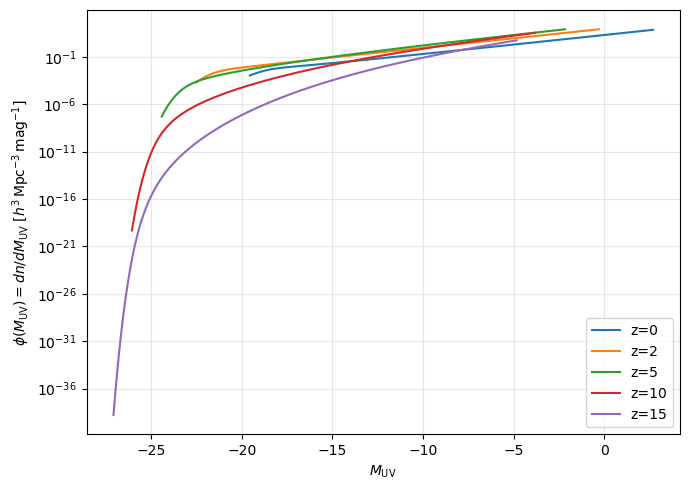

In [21]:
from hmf import MassFunction

def uvlf_from_model(z, Mmin=7, Mmax=13, dlog10m=0.05, to_physical_number_density=False):
    """
    Returns (Muv, phi) where:
      - Muv: UV magnitude array
      - phi: dn/dMuv in units of (h^3 Mpc^-3 mag^-1) by default
            If to_physical_number_density=True, converts to (Mpc^-3 mag^-1) by multiplying by h^3.
    """
    mf = MassFunction(z=z, Mmin=Mmin, Mmax=Mmax, dlog10m=dlog10m)
    h = mf.cosmo.h
    
    # masses in physical Msun
    Mh = mf.m / h
    dndlogMh = mf.dndlog10m  # h^3 Mpc^-3
    
    # Muv(Mh,z)
    Muv = Muv_from_Mh(Mh, z)
    
    # Need monotonic ordering for derivative and mapping
    # Typically: Mh increases -> Muv decreases (brighter). We'll sort by Muv increasing.
    sort = np.argsort(Muv)
    Muv_s = Muv[sort]
    Mh_s = Mh[sort]
    dndlogMh_s = dndlogMh[sort]
    
    logMh_s = np.log10(Mh_s)
    
    # derivative dlogMh/dMuv
    dlogMh_dMuv = np.gradient(logMh_s, Muv_s)
    
    phi = dndlogMh_s * np.abs(dlogMh_dMuv)  # h^3 Mpc^-3 mag^-1
    
    if to_physical_number_density:
        phi = phi * h**3  # -> Mpc^-3 mag^-1
    
    return Muv_s, phi


plt.figure(figsize=(7,5))

zs = [0, 2, 5, 10, 15]
for z in zs:
    Muv, phi = uvlf_from_model(z)
    plt.semilogy(Muv, phi, label=f"z={z}")

plt.xlabel(r"$M_{\mathrm{UV}}$")
plt.ylabel(r"$\phi(M_{\mathrm{UV}})=dn/dM_{\mathrm{UV}}\ [h^3\,\mathrm{Mpc^{-3}\,mag^{-1}}]$")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. The Luminosity Function: Observations

The UVLF has been measured extensively from $z \sim 2$ to $z \sim 10$ using deep HST imaging surveys (HUDF, CANDELS, HFF). These measurements constrain how the galaxy population evolves over the first few billion years of cosmic history.

In this exercise, you will visualize the UVLF data from Bouwens et al. (2021), one of the most comprehensive pre-JWST compilations of high-redshift UV luminosity functions.

The table below contains stepwise UVLF measurements from Bouwens et al. (2021), derived from the HUDF, HFF parallel fields, and other deep survey fields.


```python
import numpy as np

# UVLF data from Bouwens et al. (2021) - Table extracted from the paper
# Units: M_UV in AB magnitudes, phi in Mpc^-3 mag^-1

uvlf_bouwens2021 = {
    'z2': {
        'M_UV': np.array([-21.86, -21.11, -20.61, -20.11, -19.61, -19.11, -18.61, -18.11, -17.61, -17.11, -16.61]),
        'phi': np.array([0.000003, 0.000270, 0.000661, 0.001797, 0.003031, 0.004661, 0.005855, 0.007765, 0.011541, 0.010795, 0.015992]),
        'dphi': np.array([0.000008, 0.000089, 0.000154, 0.000231, 0.000301, 0.000353, 0.000437, 0.000617, 0.000835, 0.002006, 0.003437])
    },
    'z3': {
        'M_UV': np.array([-22.52, -21.77, -21.27, -20.77, -20.27, -19.77, -19.27, -18.77, -18.27, -17.77, -17.27]),
        'phi': np.array([0.000006, 0.000076, 0.000402, 0.000769, 0.001607, 0.002205, 0.003521, 0.004557, 0.006258, 0.011417, 0.010281]),
        'dphi': np.array([0.000005, 0.000038, 0.000078, 0.000117, 0.000157, 0.000189, 0.000239, 0.000297, 0.000437, 0.000656, 0.001368])
    },
    'z4': {
        'M_UV': np.array([-22.69, -22.19, -21.69, -21.19, -20.69, -20.19, -19.69, -19.19, -18.69, -17.94, -16.94, -15.94]),
        'phi': np.array([0.000005, 0.000015, 0.000144, 0.000344, 0.000698, 0.001624, 0.002276, 0.003056, 0.004371, 0.010160, 0.027420, 0.028820]),
        'dphi': np.array([0.000004, 0.000009, 0.000022, 0.000038, 0.000068, 0.000131, 0.000199, 0.000388, 0.000689, 0.000920, 0.003440, 0.008740])
    },
    'z5': {
        'M_UV': np.array([-23.11, -22.61, -22.11, -21.61, -21.11, -20.61, -20.11, -19.61, -19.11, -18.36, -17.36, -16.36]),
        'phi': np.array([0.000001, 0.000004, 0.000028, 0.000092, 0.000262, 0.000584, 0.000879, 0.001594, 0.002159, 0.004620, 0.008780, 0.025120]),
        'dphi': np.array([0.000001, 0.000002, 0.000007, 0.000013, 0.000024, 0.000044, 0.000067, 0.000156, 0.000346, 0.000520, 0.001540, 0.007340])
    },
    'z6': {
        'M_UV': np.array([-22.52, -22.02, -21.52, -21.02, -20.52, -20.02, -19.52, -18.77, -17.77, -16.77]),
        'phi': np.array([0.000002, 0.000014, 0.000051, 0.000169, 0.000317, 0.000724, 0.001147, 0.002820, 0.008360, 0.017100]),
        'dphi': np.array([0.000002, 0.000005, 0.000011, 0.000024, 0.000041, 0.000087, 0.000157, 0.000440, 0.001660, 0.005260])
    },
    'z7': {
        'M_UV': np.array([-22.19, -21.69, -21.19, -20.69, -20.19, -19.69, -19.19, -18.69, -17.94, -16.94]),
        'phi': np.array([0.000001, 0.000041, 0.000047, 0.000198, 0.000283, 0.000589, 0.001172, 0.001433, 0.005760, 0.008320]),
        'dphi': np.array([0.000002, 0.000011, 0.000015, 0.000036, 0.000066, 0.000126, 0.000336, 0.000419, 0.001440, 0.002900])
    },
    'z8': {
        'M_UV': np.array([-21.85, -21.35, -20.85, -20.10, -19.35, -18.60, -17.60]),
        'phi': np.array([0.000003, 0.000012, 0.000041, 0.000120, 0.000657, 0.001100, 0.003020]),
        'dphi': np.array([0.000002, 0.000004, 0.000011, 0.000040, 0.000233, 0.000340, 0.001140])
    },
    'z9': {
        'M_UV': np.array([-21.92, -21.12, -20.32, -19.12, -17.92]),
        'phi': np.array([0.000001, 0.000007, 0.000026, 0.000187, 0.000923]),
        'dphi': np.array([0.000001, 0.000003, 0.000009, 0.000150, 0.000501])
    },
    'z10': {
        'M_UV': np.array([-21.25, -20.25, -19.25, -18.25, -17.25]),
        'phi': np.array([0.000001, 0.000010, 0.000034, 0.000190, 0.000630]),
        'dphi': np.array([0.000001, 0.000005, 0.000022, 0.000120, 0.000520])
    }
}
```

## Excercises


1. Create a single figure showing the observed UVLF data from Bouwens et al. (2021) at all available redshifts ($z \sim 2$ to $z \sim 10$).
> - Use **different colors** for each redshift bin. A good approach is to use a sequential colormap (e.g., `plt.cm.viridis` or `plt.cm.plasma`) that maps from low-$z$ (one color) to high-$z$ (another color).\
> - Plot the data with **error bars**. Use `plt.errorbar()` with appropriate formatting.\
> - Use a **logarithmic scale** for the y-axis ($\phi$) and a linear scale for the x-axis ($M_{\rm UV}$). Add proper **axis labels**, a **legend**, and ensure the plot is publication-quality.

2. Using the UVLF model that you created in the previous excercise, generate and plot the UVLF models at the same redshifts, color coded accordingly.

3. Do you observe a good agreement between the model and the observations? At which luminosities and redshifts there is disagreement? Discuss why.

4. Let us now consider new recent data from **JWST** surveys (e.g. JADES, PRIMER, NGDEEP). Below you find measurements from two papers: Whitler et al. 2025 and Donnan et al. 2024. Using the provided arrays, plot the observed UVLFs at **z = 13 and 14** in a similar style as the HST data in the previous exercise (same colors for the same redshift, different markers for the two papers). Overplot your model predictions at the same redshifts.
Does the model reproduce the observed abundances? What can we learn if the observed number densities are higher or lower than predicted?

```python
# JWST UVLF data from Whitler+25 (units: Mpc^-3 mag^-1)
uvlf_whitler25 = {
    'z13': {
        'M_UV': np.array([-20.5, -19.5, -18.5, -17.5]),
        'phi': np.array([0.84, 3.4, 29, 71]) * 1e-5,
        'phi_err_up': np.array([0.63, 1.5, 6, 28]) * 1e-5,
        'phi_err_low': np.array([0.43, 1.3, 6, 23]) * 1e-5
    },
    'z14': {
        'M_UV': np.array([-20.2, -18.9]),
        'phi': np.array([3.2, 12]) * 1e-5,
        'phi_err_up': np.array([2.1, 7]) * 1e-5,
        'phi_err_low': np.array([1.5, 5]) * 1e-5
    }
}

# JWST UVLF data from Donnan+24 (units: Mpc^-3 mag^-1)
uvlf_donnan24 = {
    'z13': {
        'M_UV': np.array([-21.25, -20.75, -20.25, -19.75, -19.25, -18.75, -18.25]),
        'phi': np.array([3., 4., 16., 34., 43., 80., 217.]) * 1e-6,
        'phi_err_up': np.array([4., 5., 9., 23., 35., 51., 153.]) * 1e-6,
        'phi_err_low': np.array([2., 3., 6., 15., 22., 36., 104.]) * 1e-6
    },
    'z14': {
        'M_UV': np.array([-20.25]),
        'phi': np.array([3.]) * 1e-6,
        'phi_err_up': np.array([6.]) * 1e-6,
        'phi_err_low': np.array([2.]) * 1e-6
    }
}

```


In [22]:
import numpy as np

# UVLF data from Bouwens et al. (2021) - Table extracted from the paper
# Units: M_UV in AB magnitudes, phi in Mpc^-3 mag^-1

uvlf_bouwens2021 = {
    'z2': {
        'M_UV': np.array([-21.86, -21.11, -20.61, -20.11, -19.61, -19.11, -18.61, -18.11, -17.61, -17.11, -16.61]),
        'phi': np.array([0.000003, 0.000270, 0.000661, 0.001797, 0.003031, 0.004661, 0.005855, 0.007765, 0.011541, 0.010795, 0.015992]),
        'dphi': np.array([0.000008, 0.000089, 0.000154, 0.000231, 0.000301, 0.000353, 0.000437, 0.000617, 0.000835, 0.002006, 0.003437])
    },
    'z3': {
        'M_UV': np.array([-22.52, -21.77, -21.27, -20.77, -20.27, -19.77, -19.27, -18.77, -18.27, -17.77, -17.27]),
        'phi': np.array([0.000006, 0.000076, 0.000402, 0.000769, 0.001607, 0.002205, 0.003521, 0.004557, 0.006258, 0.011417, 0.010281]),
        'dphi': np.array([0.000005, 0.000038, 0.000078, 0.000117, 0.000157, 0.000189, 0.000239, 0.000297, 0.000437, 0.000656, 0.001368])
    },
    'z4': {
        'M_UV': np.array([-22.69, -22.19, -21.69, -21.19, -20.69, -20.19, -19.69, -19.19, -18.69, -17.94, -16.94, -15.94]),
        'phi': np.array([0.000005, 0.000015, 0.000144, 0.000344, 0.000698, 0.001624, 0.002276, 0.003056, 0.004371, 0.010160, 0.027420, 0.028820]),
        'dphi': np.array([0.000004, 0.000009, 0.000022, 0.000038, 0.000068, 0.000131, 0.000199, 0.000388, 0.000689, 0.000920, 0.003440, 0.008740])
    },
    'z5': {
        'M_UV': np.array([-23.11, -22.61, -22.11, -21.61, -21.11, -20.61, -20.11, -19.61, -19.11, -18.36, -17.36, -16.36]),
        'phi': np.array([0.000001, 0.000004, 0.000028, 0.000092, 0.000262, 0.000584, 0.000879, 0.001594, 0.002159, 0.004620, 0.008780, 0.025120]),
        'dphi': np.array([0.000001, 0.000002, 0.000007, 0.000013, 0.000024, 0.000044, 0.000067, 0.000156, 0.000346, 0.000520, 0.001540, 0.007340])
    },
    'z6': {
        'M_UV': np.array([-22.52, -22.02, -21.52, -21.02, -20.52, -20.02, -19.52, -18.77, -17.77, -16.77]),
        'phi': np.array([0.000002, 0.000014, 0.000051, 0.000169, 0.000317, 0.000724, 0.001147, 0.002820, 0.008360, 0.017100]),
        'dphi': np.array([0.000002, 0.000005, 0.000011, 0.000024, 0.000041, 0.000087, 0.000157, 0.000440, 0.001660, 0.005260])
    },
    'z7': {
        'M_UV': np.array([-22.19, -21.69, -21.19, -20.69, -20.19, -19.69, -19.19, -18.69, -17.94, -16.94]),
        'phi': np.array([0.000001, 0.000041, 0.000047, 0.000198, 0.000283, 0.000589, 0.001172, 0.001433, 0.005760, 0.008320]),
        'dphi': np.array([0.000002, 0.000011, 0.000015, 0.000036, 0.000066, 0.000126, 0.000336, 0.000419, 0.001440, 0.002900])
    },
    'z8': {
        'M_UV': np.array([-21.85, -21.35, -20.85, -20.10, -19.35, -18.60, -17.60]),
        'phi': np.array([0.000003, 0.000012, 0.000041, 0.000120, 0.000657, 0.001100, 0.003020]),
        'dphi': np.array([0.000002, 0.000004, 0.000011, 0.000040, 0.000233, 0.000340, 0.001140])
    },
    'z9': {
        'M_UV': np.array([-21.92, -21.12, -20.32, -19.12, -17.92]),
        'phi': np.array([0.000001, 0.000007, 0.000026, 0.000187, 0.000923]),
        'dphi': np.array([0.000001, 0.000003, 0.000009, 0.000150, 0.000501])
    },
    'z10': {
        'M_UV': np.array([-21.25, -20.25, -19.25, -18.25, -17.25]),
        'phi': np.array([0.000001, 0.000010, 0.000034, 0.000190, 0.000630]),
        'dphi': np.array([0.000001, 0.000005, 0.000022, 0.000120, 0.000520])
    }
}


# JWST UVLF data from Whitler+25 (units: Mpc^-3 mag^-1)
uvlf_whitler25 = {
    'z13': {
        'M_UV': np.array([-20.5, -19.5, -18.5, -17.5]),
        'phi': np.array([0.84, 3.4, 29, 71]) * 1e-5,
        'phi_err_up': np.array([0.63, 1.5, 6, 28]) * 1e-5,
        'phi_err_low': np.array([0.43, 1.3, 6, 23]) * 1e-5
    },
    'z14': {
        'M_UV': np.array([-20.2, -18.9]),
        'phi': np.array([3.2, 12]) * 1e-5,
        'phi_err_up': np.array([2.1, 7]) * 1e-5,
        'phi_err_low': np.array([1.5, 5]) * 1e-5
    }
}

# JWST UVLF data from Donnan+24 (units: Mpc^-3 mag^-1)
uvlf_donnan24 = {
    'z13': {
        'M_UV': np.array([-21.25, -20.75, -20.25, -19.75, -19.25, -18.75, -18.25]),
        'phi': np.array([3., 4., 16., 34., 43., 80., 217.]) * 1e-6,
        'phi_err_up': np.array([4., 5., 9., 23., 35., 51., 153.]) * 1e-6,
        'phi_err_low': np.array([2., 3., 6., 15., 22., 36., 104.]) * 1e-6
    },
    'z14': {
        'M_UV': np.array([-20.25]),
        'phi': np.array([3.]) * 1e-6,
        'phi_err_up': np.array([6.]) * 1e-6,
        'phi_err_low': np.array([2.]) * 1e-6
    }
}


### Q1.

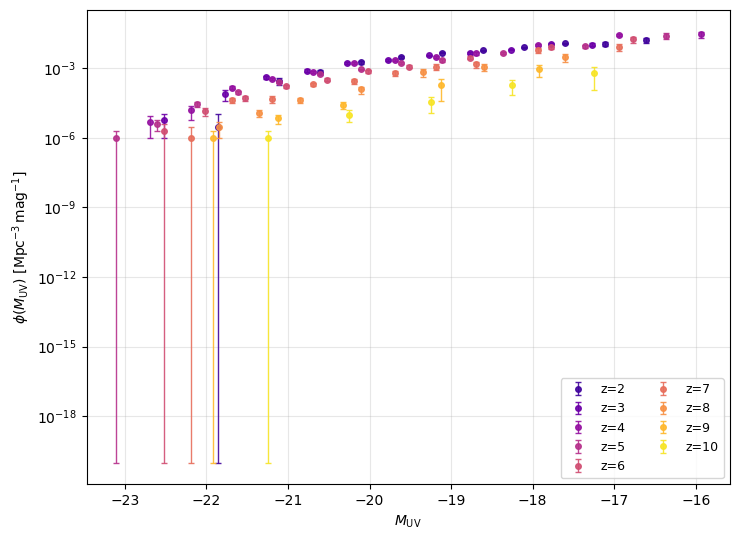

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# sort redshift keys
z_keys = list(uvlf_bouwens2021.keys())
z_vals = np.array([int(k[1:]) for k in z_keys])
order = np.argsort(z_vals)
z_keys = [z_keys[i] for i in order]
z_vals = z_vals[order]

# sequential colormap low-z -> high-z
cmap = plt.cm.plasma
colors = cmap(np.linspace(0.1, 0.95, len(z_vals)))

phi_min = 1e-20  # floor to prevent log issues when phi - dphi <= 0

plt.figure(figsize=(7.5,5.5))

for k, z, col in zip(z_keys, z_vals, colors):
    M = uvlf_bouwens2021[k]['M_UV']
    phi = uvlf_bouwens2021[k]['phi']
    dphi = uvlf_bouwens2021[k]['dphi']

    # log-safe asymmetric error bars
    err_low = np.minimum(dphi, phi - phi_min)
    err_low = np.maximum(err_low, 0.0)
    yerr = np.vstack([err_low, dphi])

    plt.errorbar(
        M, phi, yerr=yerr,
        fmt='o', ms=4, capsize=2, elinewidth=1,
        color=col, label=f"z={z}", alpha=0.9
    )

plt.yscale('log')
plt.xlabel(r"$M_{\mathrm{UV}}$")
plt.ylabel(r"$\phi(M_{\mathrm{UV}})\ [\mathrm{Mpc^{-3}\,mag^{-1}}]$")

# Optional: keep plot focused on where the data are
# plt.xlim(-23.5, -15.5)
# plt.ylim(1e-6, 5e-2)

plt.legend(ncol=2, fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

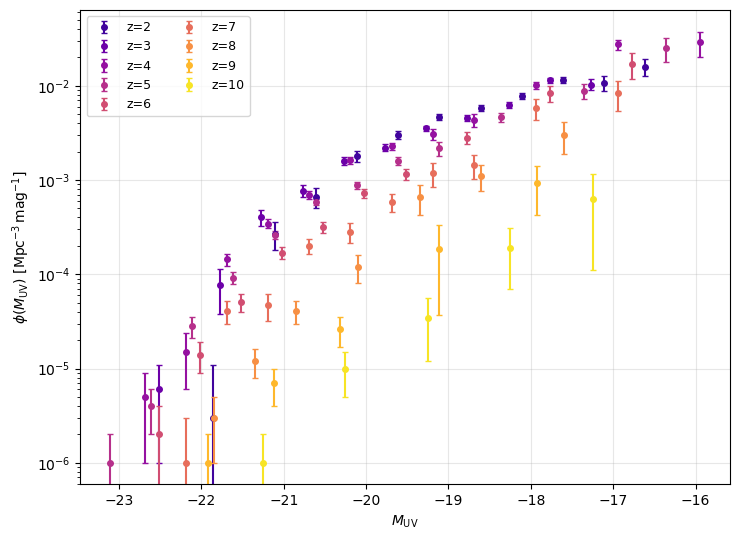

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# sort redshift keys
z_keys = list(uvlf_bouwens2021.keys())
z_vals = np.array([int(k[1:]) for k in z_keys])
order = np.argsort(z_vals)
z_keys = [z_keys[i] for i in order]
z_vals = z_vals[order]

# sequential colormap low-z -> high-z
cmap = plt.cm.plasma
colors = cmap(np.linspace(0.1, 0.95, len(z_vals)))

plt.figure(figsize=(7.5,5.5))

for k, z, col in zip(z_keys, z_vals, colors):
    M = uvlf_bouwens2021[k]['M_UV']
    phi = uvlf_bouwens2021[k]['phi']
    dphi = uvlf_bouwens2021[k]['dphi']
    plt.errorbar(M, phi, yerr=dphi, fmt='o', ms=4, capsize=2,
                 color=col, label=f"z={z}")

plt.yscale('log')
plt.xlabel(r"$M_{\mathrm{UV}}$")
plt.ylabel(r"$\phi(M_{\mathrm{UV}})\ [\mathrm{Mpc^{-3}\,mag^{-1}}]$")
# optional: conventional astronomy layout (bright left)
# plt.gca().invert_xaxis()

plt.legend(ncol=2, fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Q2.

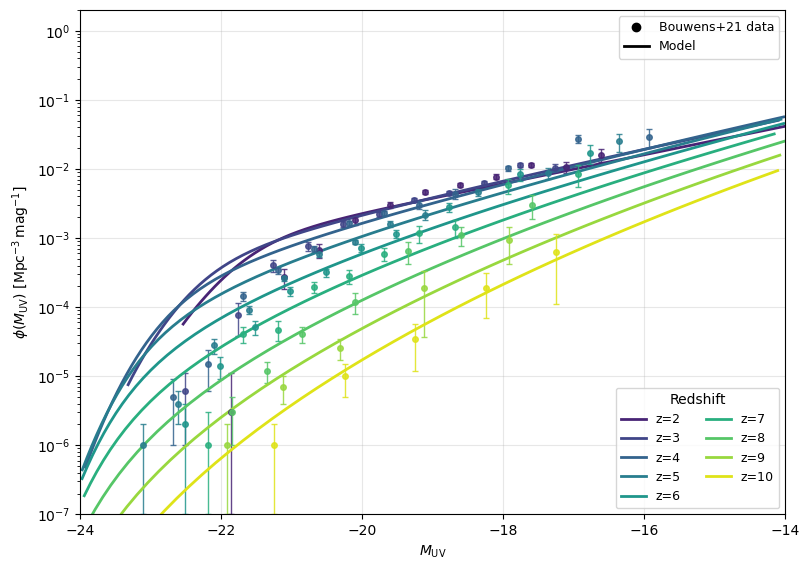

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# --- Sort redshift keys z=2..10 ---
z_keys = list(uvlf_bouwens2021.keys())
z_vals = np.array([int(k[1:]) for k in z_keys])
order = np.argsort(z_vals)
z_keys = [z_keys[i] for i in order]
z_vals = z_vals[order]

# --- Colormap low-z -> high-z ---
cmap = plt.cm.viridis
colors = cmap(np.linspace(0.1, 0.95, len(z_vals)))

# --- Plot limits to keep the comparison readable ---
Mmin_plot, Mmax_plot = -24, -14     # magnitude range shown
phi_min = 1e-7                     # floor for log plotting (prevents negative/zero errorbars)

plt.figure(figsize=(8.2, 5.8))

for k, z, col in zip(z_keys, z_vals, colors):
    # ---- Data (Bouwens+21) ----
    M = uvlf_bouwens2021[k]['M_UV']
    phi = uvlf_bouwens2021[k]['phi']
    dphi = uvlf_bouwens2021[k]['dphi']

    # Clip lower error so phi - err_low stays > 0 for log scale
    err_low = np.minimum(dphi, phi - phi_min)
    err_low = np.maximum(err_low, 0.0)   # enforce non-negative
    yerr = np.vstack([err_low, dphi])    # asymmetric errors

    plt.errorbar(
        M, phi, yerr=yerr,
        fmt='o', ms=4, capsize=2, elinewidth=1,
        color=col, alpha=0.85,
        label="_nolegend_"  # don't clutter legend with data entries
    )

    # ---- Model ----
    Muv_m, phi_m = uvlf_from_model(int(z), to_physical_number_density=True)

    # Restrict model to plotted magnitude range + valid values
    mask = (
        (Muv_m >= Mmin_plot) & (Muv_m <= Mmax_plot) &
        np.isfinite(Muv_m) & np.isfinite(phi_m) & (phi_m > 0)
    )

    plt.semilogy(
        Muv_m[mask], phi_m[mask],
        '-', color=col, lw=2.0,
        label=f"z={z}"  # one legend entry per redshift (model line)
    )

plt.yscale('log')
plt.xlim(Mmin_plot, Mmax_plot)
plt.ylim(phi_min, 2e0)  # adjust upper limit if you want
plt.xlabel(r"$M_{\mathrm{UV}}$")
plt.ylabel(r"$\phi(M_{\mathrm{UV}})\ [\mathrm{Mpc^{-3}\,mag^{-1}}]$")
plt.grid(True, alpha=0.3)

# --- Two-part legend: (style) + (redshift colors) ---
style_handles = [
    Line2D([0], [0], marker='o', color='k', linestyle='None', markersize=6, label='Bouwens+21 data'),
    Line2D([0], [0], color='k', linestyle='-', linewidth=2, label='Model'),
]
leg1 = plt.legend(handles=style_handles, loc='upper right', frameon=True, fontsize=9)
plt.gca().add_artist(leg1)

plt.legend(title="Redshift", ncol=2, fontsize=9, loc='lower right', frameon=True)

plt.tight_layout()
plt.show()

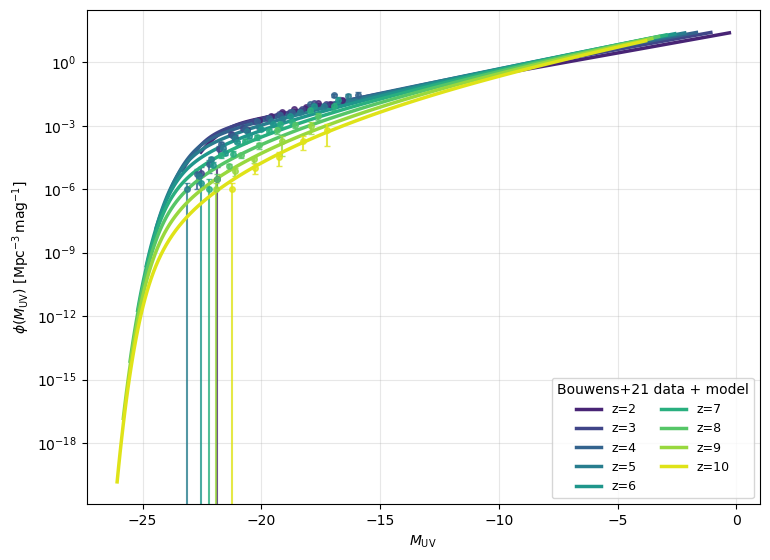

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Sort redshifts
z_keys = list(uvlf_bouwens2021.keys())
z_vals = np.array([int(k[1:]) for k in z_keys])
order = np.argsort(z_vals)
z_keys = [z_keys[i] for i in order]
z_vals = z_vals[order]

# Color map: low-z -> high-z
cmap = plt.cm.viridis
colors = cmap(np.linspace(0.1, 0.95, len(z_vals)))

plt.figure(figsize=(7.8,5.7))

for k, z, col in zip(z_keys, z_vals, colors):
    # Observations
    M = uvlf_bouwens2021[k]['M_UV']
    phi = uvlf_bouwens2021[k]['phi']
    dphi = uvlf_bouwens2021[k]['dphi']
    plt.errorbar(M, phi, yerr=dphi, fmt='o', ms=4, capsize=2,
                 color=col, alpha=0.8)

    # Model (convert to physical units Mpc^-3 mag^-1)
    Muv_m, phi_m = uvlf_from_model(int(z), to_physical_number_density=True)
    # restrict to observational magnitude range
    mask = (Muv_m > -26) & (Muv_m < -14)
    plt.semilogy(Muv_m, phi_m, '-', color=col, lw=2.5, label=f"z={z}")

plt.yscale('log')
plt.xlabel(r"$M_{\mathrm{UV}}$")
plt.ylabel(r"$\phi(M_{\mathrm{UV}})\ [\mathrm{Mpc^{-3}\,mag^{-1}}]$")
# optional conventional layout:
# plt.gca().invert_xaxis()

plt.legend(title="Bouwens+21 data + model", ncol=2, fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Q4.

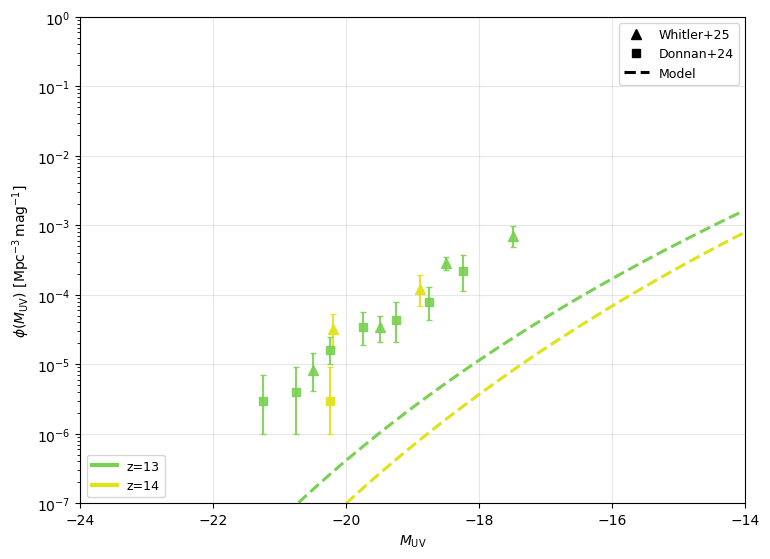

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

phi_min = 1e-20  # floor for log plotting

# Assign consistent colors for z=13 and z=14
z_list = [13, 14]
cols = plt.cm.viridis(np.linspace(0.80, 0.95, len(z_list)))  # high-z end
color_map = {z: c for z, c in zip(z_list, cols)}

plt.figure(figsize=(7.8,5.7))

# ---------- Whitler+25 (triangles) ----------
for zlab, z in [('z13', 13), ('z14', 14)]:
    col = color_map[z]
    M = uvlf_whitler25[zlab]['M_UV']
    phi = uvlf_whitler25[zlab]['phi']
    err_up = uvlf_whitler25[zlab]['phi_err_up']
    err_low = uvlf_whitler25[zlab]['phi_err_low']

    # log-safe lower errors (clip so phi - err_low > 0)
    err_low_clip = np.minimum(err_low, phi - phi_min)
    err_low_clip = np.maximum(err_low_clip, 0.0)
    yerr = np.vstack([err_low_clip, err_up])

    plt.errorbar(M, phi, yerr=yerr, fmt='^', ms=7, capsize=2,
                 color=col, alpha=0.9, label=f"Whitler+25 z={z}")

# ---------- Donnan+24 (squares) ----------
for zlab, z in [('z13', 13), ('z14', 14)]:
    col = color_map[z]
    M = uvlf_donnan24[zlab]['M_UV']
    phi = uvlf_donnan24[zlab]['phi']
    err_up = uvlf_donnan24[zlab]['phi_err_up']
    err_low = uvlf_donnan24[zlab]['phi_err_low']

    err_low_clip = np.minimum(err_low, phi - phi_min)
    err_low_clip = np.maximum(err_low_clip, 0.0)
    yerr = np.vstack([err_low_clip, err_up])

    plt.errorbar(M, phi, yerr=yerr, fmt='s', ms=6, capsize=2,
                 color=col, alpha=0.9, label=f"Donnan+24 z={z}")

# ---------- Model curves (dashed) ----------
for z in [13, 14]:
    col = color_map[z]
    Muv_m, phi_m = uvlf_from_model(z, to_physical_number_density=True)

    # Restrict to a sensible JWST plotting range
    mask = (Muv_m > -24) & (Muv_m < -14) & np.isfinite(phi_m) & (phi_m > 0)
    plt.semilogy(Muv_m[mask], phi_m[mask], '--', color=col, lw=2.2, label=f"Model z={z}")

plt.yscale('log')
plt.xlabel(r"$M_{\mathrm{UV}}$")
plt.ylabel(r"$\phi(M_{\mathrm{UV}})\ [\mathrm{Mpc^{-3}\,mag^{-1}}]$")
plt.xlim(-24, -14.0)
plt.ylim(1e-7, 1e0)
plt.grid(True, alpha=0.3)

# Optional: cleaner legend by splitting "style" vs "redshift"
style_handles = [
    Line2D([0],[0], marker='^', color='k', linestyle='None', markersize=7, label='Whitler+25'),
    Line2D([0],[0], marker='s', color='k', linestyle='None', markersize=6, label='Donnan+24'),
    Line2D([0],[0], color='k', linestyle='--', linewidth=2.2, label='Model'),
]
leg1 = plt.legend(handles=style_handles, loc='upper right', frameon=True, fontsize=9)
plt.gca().add_artist(leg1)

# Redshift color legend (two entries)
z_handles = [
    Line2D([0],[0], color=color_map[13], lw=3, label='z=13'),
    Line2D([0],[0], color=color_map[14], lw=3, label='z=14'),
]
plt.legend(handles=z_handles, loc='lower left', frameon=True, fontsize=9)

plt.tight_layout()
plt.show()

# 5. Computing the Stellar Mass Function from the Halo Mass Function

One of the fundamental goals in galaxy formation theory is to connect the observed properties of galaxies to their underlying dark matter halos. The **stellar mass function (SMF)** describes the number density of galaxies as a function of stellar mass and is a key observable that encodes information about how efficiently galaxies convert baryons into stars across cosmic time.

In this exercise, you will compute a theoretical prediction for the SMF starting from the **halo mass function (HMF)** and using a parametric **stellar-to-halo mass relation (SHMR)** to map halo masses to stellar masses.


### Exercises:
1. What is the SHMR? Write down the equation that maps $M_{\star}$ to $M_{\rm h}$. Comment on the meaning of the different terms.

2. Write down the functional form for the **integrated** star formation efficiency. describe its behavior as a function of mass and what the different parameters mean.

3. Write a function `eps_func` that returns the **integrated** star formation efficiency $\epsilon_\star(M_h)$. It should take arguments the halo mass and the model parameters.

4. Write a function  `Mstar_from_Mhalo(Mhalo, dndlogMh, ...)` that:
   - Takes as arguments the halo mass, halo mass function ($dn/d\log M_h$), and the $\epsilon_\star(M_h)$ parameters.
   - Computes stellar masses from halo masses using the SHMR
   - Calculates the Jacobian $|d\log M_h / d\log M_\star|$ numerically (hint: use `np.gradient` to do this for arrays)
   - Returns the predicted SMF

5. Using the provided HMF (computed with the `hmf` package at $z = 2.25$) and observed SMF data, **plot your model prediction against the observations**. The observed SMF from Shuntov et al. 2025 A&A 695, A20  at $z\sim2.25$ is given here
```python
smf_z225 = {'logM': np.array([8.21306, 8.46306, 8.71306, 8.96306, 9.21306, 9.46306, 9.71306, 9.96306, 10.21306,10.46306,10.71306,10.96306,11.21306,11.46306,11.71306]),
            'Phi': np.array([0.013084346166009852  , 0.010379326514175067  , 0.00775286002215234   , 0.005806357374608155  , 0.004249026867327707  , 0.0031424122582643264 , 0.0023907618773484733 , 0.0016998856015202012 , 0.0012822767925096696 , 0.0009003845331311868 , 0.0006349251979802012 , 0.000350838661824572  , 0.0001397144715866281 , 2.483812578679299e-05 , 1.5523828033065058e-06]),
            'dPhi': np.array([0.0023195235898970075,0.0019066127186619895,0.001476462834201079,0.0011465737198222664,0.0008703955487924897,0.000667979515443438,0.0005274949664250413,0.00038963272692194885,0.0003054299752569285,0.0002231311885513113,0.00016391459638947513,9.507879915872162e-05,4.0918633018436236e-05,9.46691130760608e-06,1.4849627347883438e-06])}

```

6. Experiment with the SHMR parameters to find values that provide a reasonable fit to the data. What do you notice about the degeneracies between parameters?

7. Explain the missmatch between the HMF and the observed (and modeled) SMF. What physical mechanisms can be attributed to explain the missmatch at different masses.

8. Which halos are most efficient in forming stars? Discuss your opinions why.

## Redshift Evolution of the Stellar Mass Function

In the previous exercise, you built a model to predict the SMF at a single redshift. Now you will extend this analysis to multiple redshifts to explore how well a **single, non-evolving SHMR** can reproduce observations across cosmic time.

This exercise will reveal the tension between simple models and observations — a central theme in understanding galaxy formation physics.

## Data

Download the observed SMF data from COSMOS-Web (Shuntov et al. 2025) from the following GitHub repository:

**URL:** [https://github.com/mShuntov/SMF_in_COSMOS-Web_Shuntov2024/blob/main/SMF_data_points.ecsv](https://github.com/mShuntov/SMF_in_COSMOS-Web_Shuntov2024/blob/main/SMF_data_points.ecsv)

You can download the raw file using:

```python
import urllib.request
url = "https://raw.githubusercontent.com/mShuntov/SMF_in_COSMOS-Web_Shuntov2024/main/SMF_data_points.ecsv"
urllib.request.urlretrieve(url, "SMF_data_points.ecsv")
```

The file is in ECSV format (Enhanced CSV), which can be read using `astropy`:

```python
from astropy.table import Table
smf_data = Table.read("SMF_data_points.ecsv", format='ascii.ecsv')
print(smf_data.colnames)  # Inspect available columns
print(smf_data.meta)      # Check metadata for redshift bins
```

The different redshift bins in which the SMF is computed are specified with strings given here for convenience
```python
zbins_str = ['0.2 < z < 0.5','0.5 < z < 0.8' ,'0.8 < z < 1.1' ,'1.1 < z < 1.5','1.5 < z < 2.0' ,'2.0 < z < 2.5' ,'2.5 < z < 3.0' ,'3.0 < z < 3.5' ,'3.5 < z < 4.5' ,'4.5 < z < 5.5' ,'5.5 < z < 6.5','6.5 < z < 7.5','7.5 < z < 8.5','8.5 < z < 10.0','10.0 < z < 12.0']
```

For a given bin, e.g., `'5.5<z<6.5'` you can load it as
```python
zb = '5.5<z<6.5'
logmass = smf_data[smf_data['Redshift']==zb]['M_star']
Phi = smf_data[smf_data['Redshift']==zb]['Phi']
dPhi = smf_data[smf_data['Redshift']==zb]['dPhi']
```

### Exercises:
9. Plot all the observed SMFs on a single figure with different colors for each redshift bin.


10. Using the functions built in the previous excercises, compute the HMF and predicted SMF at each redshift present in the data. Use the **same SHMR parameters** for all redshifts (i.e., assume no redshift evolution in the parameters).

11. Create a multi-panel figure (e.g., 3×5 grid) where each panel shows:
   - The HMF at that redshift (dashed line)
   - The model SMF prediction (solid line)
   - The observed SMF data points with error bars
   - A legend indicating the redshift and the different curves/symbols

   Use consistent axis limits across all panels to facilitate comparison.



12. Discuss the following questions:

   - At which redshifts does the non-evolving SHMR model work well? At which redshifts does it fail?
   
   - At the low-mass end ($M_\star < 10^9 M_\odot$): How does the model compare to observations at low vs. high redshift? What physical processes might cause evolution in the low-mass slope?
   
   - At the high-mass end ($M_\star > 10^{11} M_\odot$): Does the model over- or under-predict the abundance of massive galaxies at different redshifts? What does this tell us about AGN feedback efficiency over cosmic time?
   
   - At **high redshift** ($z > 6$): JWST has revealed an apparent excess of bright/massive galaxies compared to pre-JWST predictions. Do you see evidence for this in the data? How might the SHMR need to evolve to match these observations?

13. **Bonus**: Modify your model to allow the SHMR parameters to evolve with redshift. A simple parameterization might be:

   $$\epsilon_0(z) = \epsilon_{0,0} \times (1+z)^{\gamma_\epsilon}$$
   
   $$\log M_c(z) = \log M_{c,0} + \gamma_M \times z$$

   Can you find evolution parameters ($\gamma_\epsilon$, $\gamma_M$) that improve the fit across all redshifts?



In [23]:
smf_z225 = {'logM': np.array([8.21306, 8.46306, 8.71306, 8.96306, 9.21306, 9.46306, 9.71306, 9.96306, 10.21306,10.46306,10.71306,10.96306,11.21306,11.46306,11.71306]),
            'Phi': np.array([0.013084346166009852  , 0.010379326514175067  , 0.00775286002215234   , 0.005806357374608155  , 0.004249026867327707  , 0.0031424122582643264 , 0.0023907618773484733 , 0.0016998856015202012 , 0.0012822767925096696 , 0.0009003845331311868 , 0.0006349251979802012 , 0.000350838661824572  , 0.0001397144715866281 , 2.483812578679299e-05 , 1.5523828033065058e-06]),
            'dPhi': np.array([0.0023195235898970075,0.0019066127186619895,0.001476462834201079,0.0011465737198222664,0.0008703955487924897,0.000667979515443438,0.0005274949664250413,0.00038963272692194885,0.0003054299752569285,0.0002231311885513113,0.00016391459638947513,9.507879915872162e-05,4.0918633018436236e-05,9.46691130760608e-06,1.4849627347883438e-06])}


import urllib.request
url = "https://raw.githubusercontent.com/mShuntov/SMF_in_COSMOS-Web_Shuntov2024/main/SMF_data_points.ecsv"
urllib.request.urlretrieve(url, "SMF_data_points.ecsv")

from astropy.table import Table
smf_data = Table.read("SMF_data_points.ecsv", format='ascii.ecsv')
print(smf_data.colnames)  # Inspect available columns
print(smf_data.meta)      # Check metadata for redshift bins

zbins_str = ['0.2 < z < 0.5','0.5 < z < 0.8' ,'0.8 < z < 1.1' ,'1.1 < z < 1.5','1.5 < z < 2.0' ,'2.0 < z < 2.5' ,'2.5 < z < 3.0' ,'3.0 < z < 3.5' ,'3.5 < z < 4.5' ,'4.5 < z < 5.5' ,'5.5 < z < 6.5','6.5 < z < 7.5','7.5 < z < 8.5','8.5 < z < 10.0','10.0 < z < 12.0']

zb = '5.5<z<6.5'
logmass = smf_data[smf_data['Redshift']==zb]['M_star']
Phi = smf_data[smf_data['Redshift']==zb]['Phi']
dPhi = smf_data[smf_data['Redshift']==zb]['dPhi']

['Redshift', 'M_star', 'Phi', 'dPhi']
{'cosmology': {'H0': 70.0, 'Omega_lambda': 0.7, 'Omega_m': 0.3}, 'IMF': 'Chabrier03'}


### Q3.

In [40]:
import numpy as np

def eps_func(Mh, eps0=0.2, Mc=1e12, a=1.5, b=0.6):
    """
    Integrated star formation efficiency ε*(Mh) = M*/(fb * Mh).
    Double power-law with a peak near Mc.
    
    Mh: halo mass [Msun]
    returns: ε*(Mh) dimensionless
    """
    Mh = np.asarray(Mh, dtype=float)
    x = Mh / Mc
    return (2.0 * eps0) / (x**(-a) + x**(b))

### Q4.

In [41]:
def Mstar_from_Mhalo(Mhalo, dndlogMh, fb=0.156, eps_params=None):
    """
    Convert HMF (dn/dlog10 Mh) into SMF (dn/dlog10 M*) using:
      M* = fb * ε*(Mh) * Mh
    
    Returns:
      logMstar, dndlogMstar
    """
    if eps_params is None:
        eps_params = dict(eps0=0.2, Mc=1e12, a=1.5, b=0.6)

    Mhalo = np.asarray(Mhalo, dtype=float)
    dndlogMh = np.asarray(dndlogMh, dtype=float)

    eps = eps_func(Mhalo, **eps_params)
    Mstar = fb * eps * Mhalo

    logMh = np.log10(Mhalo)
    logMstar = np.log10(Mstar)

    # Jacobian |d logMh / d logMstar|
    dlogMstar_dlogMh = np.gradient(logMstar, logMh)
    jac = np.abs(1.0 / dlogMstar_dlogMh)

    dndlogMstar = dndlogMh * jac

    # sort by logMstar for clean plotting
    s = np.argsort(logMstar)
    return logMstar[s], dndlogMstar[s]

### Q5.

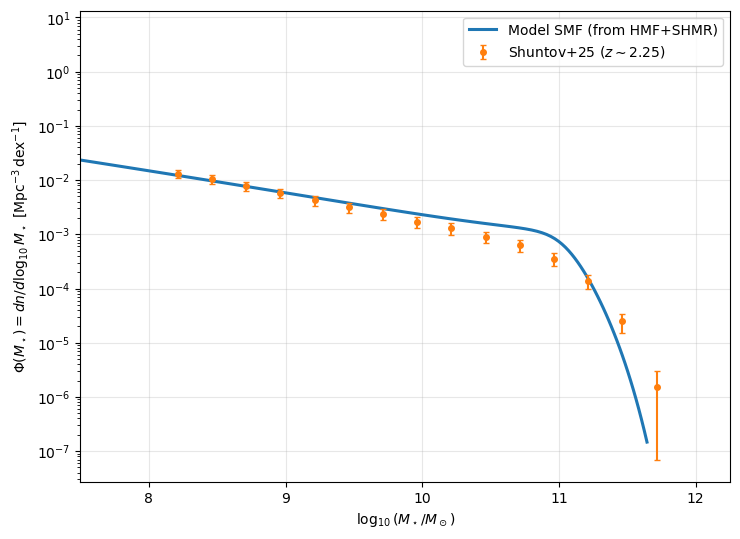

In [43]:
import matplotlib.pyplot as plt
from hmf import MassFunction

# --- HMF at z=2.25 ---
z = 2.25
mf = MassFunction(z=z, Mmin=8, Mmax=14, dlog10m=0.05)
h = mf.cosmo.h

# mf.m is in h^-1 Msun  -> physical Msun
Mhalo = mf.m / h

# mf.dndlog10m is in h^3 Mpc^-3 dex^-1 -> physical Mpc^-3 dex^-1
dndlogMh = mf.dndlog10m * h**3

# --- SHMR / efficiency params (starting point; tune in Ex 6) ---
eps_params = dict(eps0=0.2, Mc=1e12, a=1.5, b=0.6)
fb = 0.156

logMstar_model, Phi_model = Mstar_from_Mhalo(Mhalo, dndlogMh, fb=fb, eps_params=eps_params)

plt.figure(figsize=(7.5,5.5))

# Model SMF
plt.semilogy(logMstar_model, Phi_model, '-', lw=2.2, label="Model SMF (from HMF+SHMR)")

# Observed SMF at z~2.25
plt.errorbar(smf_z225['logM'], smf_z225['Phi'], yerr=smf_z225['dPhi'],
             fmt='o', ms=4, capsize=2, label=r"Shuntov+25 ($z\sim2.25$)")

plt.xlabel(r"$\log_{10}(M_\star/M_\odot)$")
plt.xlim(7.5, 12.25)
plt.ylabel(r"$\Phi(M_\star)=dn/d\log_{10}M_\star\ [\mathrm{Mpc^{-3}\,dex^{-1}}]$")
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

### Q6.

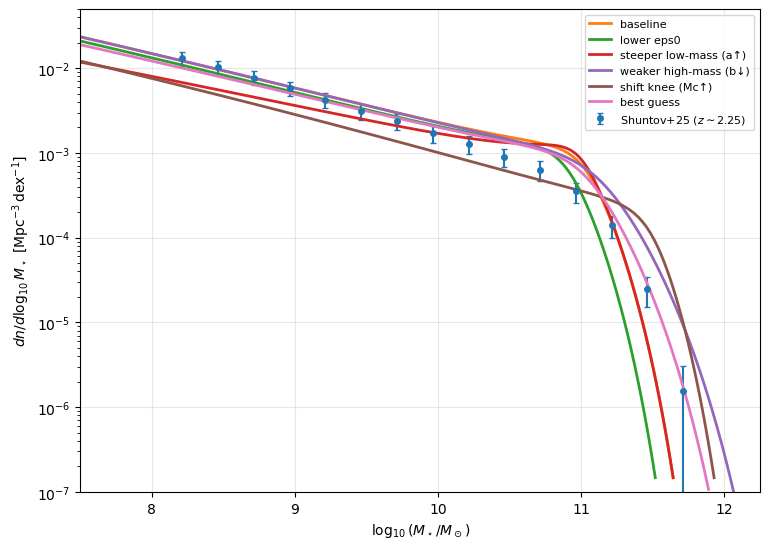

In [54]:
import matplotlib.pyplot as plt
from hmf import MassFunction

# --- HMF at z=2.25 (same as before) ---
z = 2.25
mf = MassFunction(z=z, Mmin=8, Mmax=14, dlog10m=0.05)
h = mf.cosmo.h

Mhalo = mf.m / h
dndlogMh = mf.dndlog10m * h**3  # physical Mpc^-3 dex^-1
fb = 0.156

# --- Parameter sets to try (edit these as you like) ---
param_sets = [
    ("baseline", dict(eps0=0.20, Mc=1e12,   a=1.5, b=0.6)),
    ("lower eps0", dict(eps0=0.15, Mc=1e12, a=1.5, b=0.6)),
    ("steeper low-mass (a↑)", dict(eps0=0.20, Mc=1e12, a=2.0, b=0.6)),
    ("weaker high-mass (b↓)", dict(eps0=0.20, Mc=1e12, a=1.5, b=0.4)),
    ("shift knee (Mc↑)", dict(eps0=0.20, Mc=3e12, a=1.5, b=0.6)),
    ("best guess", dict(eps0=0.17, Mc=1e12, a=1.6, b=0.45)),
]

plt.figure(figsize=(7.8,5.6))

# Observations
plt.errorbar(smf_z225['logM'], smf_z225['Phi'], yerr=smf_z225['dPhi'],
             fmt='o', ms=4, capsize=2, label=r"Shuntov+25 ($z\sim2.25$)")

# Models
for name, p in param_sets:
    logMstar_model, Phi_model = Mstar_from_Mhalo(Mhalo, dndlogMh, fb=fb, eps_params=p)
    plt.semilogy(logMstar_model, Phi_model, lw=2.0, label=name)

plt.xlabel(r"$\log_{10}(M_\star/M_\odot)$")
plt.ylabel(r"$dn/d\log_{10}M_\star\ [\mathrm{Mpc^{-3}\,dex^{-1}}]$")
plt.yscale('log')
plt.xlim(7.5, 12.25)
plt.ylim(1e-7, 5e-2)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

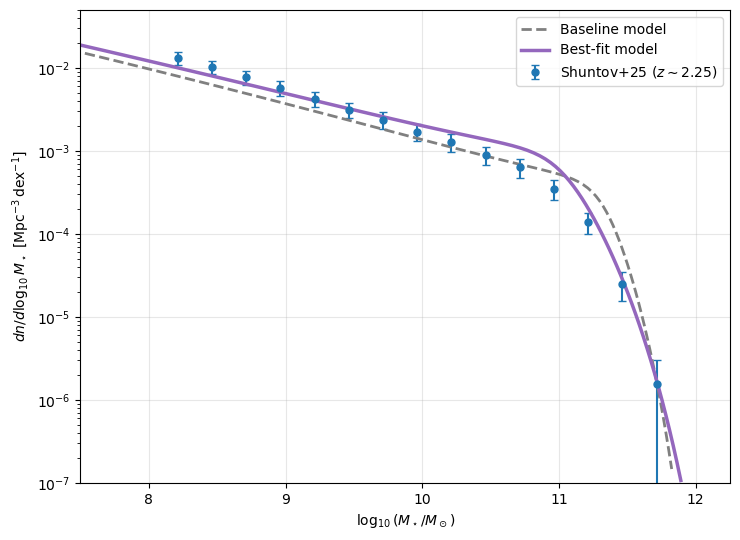

In [60]:
import matplotlib.pyplot as plt
from hmf import MassFunction

# --- HMF at z=2.25 ---
z = 2.25
mf = MassFunction(z=z, Mmin=8, Mmax=14, dlog10m=0.05)
h = mf.cosmo.h

Mhalo = mf.m / h
dndlogMh = mf.dndlog10m * h**3  # physical Mpc^-3 dex^-1
fb = 0.156

# --- Baseline parameters ---
baseline_params = dict(eps0=0.20, Mc=2e12, a=1.5, b=0.6)

# --- Best-fit parameters (your tuned set) ---
best_params = dict(eps0=0.17, Mc=1e12, a=1.6, b=0.45)

# Compute models
logMstar_base, Phi_base = Mstar_from_Mhalo(Mhalo, dndlogMh, fb=fb, eps_params=baseline_params)
logMstar_best, Phi_best = Mstar_from_Mhalo(Mhalo, dndlogMh, fb=fb, eps_params=best_params)

# --- Plot ---
plt.figure(figsize=(7.5,5.5))

# Observed data
plt.errorbar(
    smf_z225['logM'],
    smf_z225['Phi'],
    yerr=smf_z225['dPhi'],
    fmt='o',
    ms=5,
    capsize=3,
    color='tab:blue',
    label=r"Shuntov+25 ($z\sim2.25$)"
)

# Baseline model
plt.semilogy(
    logMstar_base,
    Phi_base,
    '--',
    color='gray',
    lw=2,
    label="Baseline model"
)

# Best-fit model
plt.semilogy(
    logMstar_best,
    Phi_best,
    '-',
    color='tab:purple',
    lw=2.5,
    label="Best-fit model"
)

plt.xlabel(r"$\log_{10}(M_\star/M_\odot)$")
plt.ylabel(r"$dn/d\log_{10}M_\star\ [\mathrm{Mpc^{-3}\,dex^{-1}}]$")
plt.xlim(7.5, 12.25)
plt.ylim(1e-7, 5e-2)
plt.yscale('log')

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

Best grid params: {'eps0': 0.16, 'Mc': 2000000000000.0, 'a': 1.2, 'b': 0.55}
Best reduced chi-like score (log-space): 0.4075437002290168


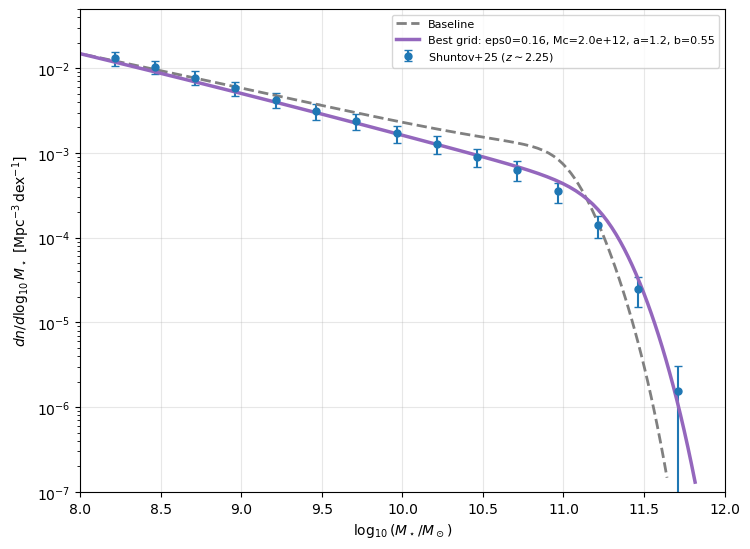

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from hmf import MassFunction

# -------------------------
# Setup: HMF at z=2.25
# -------------------------
z = 2.25
mf = MassFunction(z=z, Mmin=8, Mmax=14, dlog10m=0.05)
h = mf.cosmo.h

Mhalo = mf.m / h
dndlogMh = mf.dndlog10m * h**3  # physical Mpc^-3 dex^-1
fb = 0.156

# Observed data
logM_obs = np.array(smf_z225["logM"])
Phi_obs  = np.array(smf_z225["Phi"])
dPhi_obs = np.array(smf_z225["dPhi"])

# Use only points with decent S/N and in a clean mass range
mask_obs = (logM_obs >= 8.0) & (logM_obs <= 11.6) & (Phi_obs > 0) & (dPhi_obs > 0)
logM_fit = logM_obs[mask_obs]
Phi_fit  = Phi_obs[mask_obs]
dPhi_fit = dPhi_obs[mask_obs]

# We'll compare in log10 space (more appropriate on log y-plots)
logPhi_fit = np.log10(Phi_fit)
# approximate log-error from linear error: sigma_log ~ (dPhi/Phi)/ln(10)
sig_logPhi = (dPhi_fit / Phi_fit) / np.log(10)

def model_logphi_at_points(params_dict):
    """Return log10(phi_model) interpolated at the observed logM points."""
    logM_model, Phi_model = Mstar_from_Mhalo(Mhalo, dndlogMh, fb=fb, eps_params=params_dict)

    # filter to positive values and monotonic x for interpolation
    ok = np.isfinite(logM_model) & np.isfinite(Phi_model) & (Phi_model > 0)
    logM_model = logM_model[ok]
    Phi_model  = Phi_model[ok]

    # Need increasing x for np.interp
    s = np.argsort(logM_model)
    logM_model = logM_model[s]
    Phi_model  = Phi_model[s]

    # Interpolate in log-space
    logPhi_model = np.interp(logM_fit, logM_model, np.log10(Phi_model),
                             left=np.nan, right=np.nan)
    return logPhi_model

def score_params(params_dict):
    """Chi^2-like score in log space (ignore points where model is nan)."""
    logPhi_m = model_logphi_at_points(params_dict)
    good = np.isfinite(logPhi_m) & np.isfinite(logPhi_fit) & (sig_logPhi > 0)
    if np.sum(good) < 5:
        return np.inf
    chi2 = np.sum(((logPhi_m[good] - logPhi_fit[good]) / sig_logPhi[good])**2)
    return chi2 / np.sum(good)  # reduced-like

# -------------------------
# Coarse grid search
# -------------------------
eps0_grid = [0.12, 0.14, 0.16, 0.18, 0.20]
Mc_grid   = [5e11, 1e12, 2e12, 3e12]
a_grid    = [1.2, 1.5, 1.8, 2.1]
b_grid    = [0.35, 0.45, 0.55, 0.65]

best = {"chi": np.inf, "params": None}

for eps0 in eps0_grid:
    for Mc in Mc_grid:
        for a in a_grid:
            for b in b_grid:
                p = dict(eps0=eps0, Mc=Mc, a=a, b=b)
                chi = score_params(p)
                if chi < best["chi"]:
                    best["chi"] = chi
                    best["params"] = p

print("Best grid params:", best["params"])
print("Best reduced chi-like score (log-space):", best["chi"])

# -------------------------
# Plot baseline vs best-grid vs data
# -------------------------
baseline_params = dict(eps0=0.20, Mc=1e12, a=1.5, b=0.6)
best_grid_params = best["params"]

logM_base, Phi_base = Mstar_from_Mhalo(Mhalo, dndlogMh, fb=fb, eps_params=baseline_params)
logM_best, Phi_best = Mstar_from_Mhalo(Mhalo, dndlogMh, fb=fb, eps_params=best_grid_params)

plt.figure(figsize=(7.6,5.6))

plt.errorbar(logM_obs, Phi_obs, yerr=dPhi_obs, fmt='o', ms=5, capsize=3,
             color='tab:blue', label=r"Shuntov+25 ($z\sim2.25$)")

plt.semilogy(logM_base, Phi_base, '--', color='gray', lw=2, label="Baseline")

plt.semilogy(logM_best, Phi_best, '-', color='tab:purple', lw=2.5,
             label=f"Best grid: eps0={best_grid_params['eps0']}, Mc={best_grid_params['Mc']:.1e}, a={best_grid_params['a']}, b={best_grid_params['b']}")

plt.xlabel(r"$\log_{10}(M_\star/M_\odot)$")
plt.ylabel(r"$dn/d\log_{10}M_\star\ [\mathrm{Mpc^{-3}\,dex^{-1}}]$")
plt.xlim(8, 12)
plt.ylim(1e-7, 5e-2)
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

### Q9.

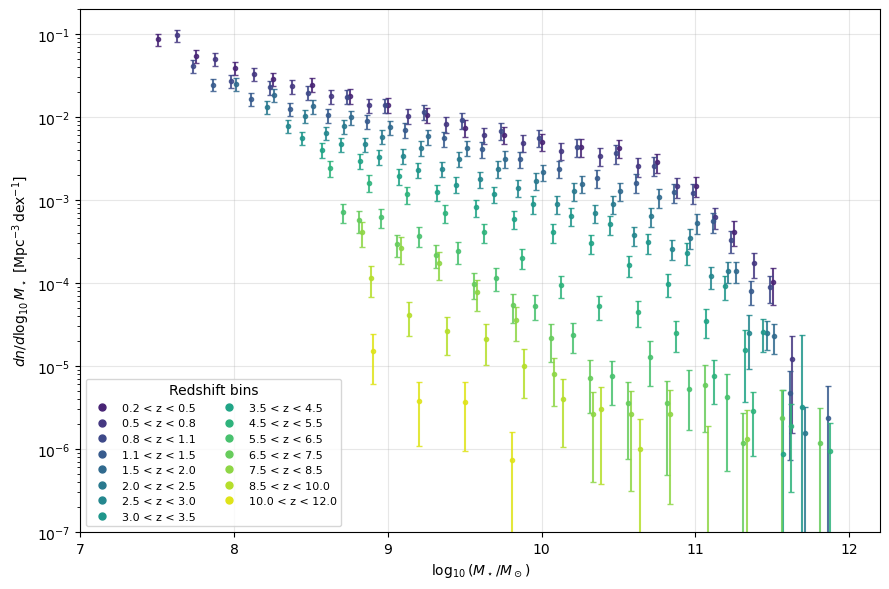

In [61]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))

cmap = plt.cm.viridis
colors = cmap(np.linspace(0.1, 0.95, len(zbins_str)))

handles = []
labels = []

for zb, col in zip(zbins_str, colors):
    zb_clean = zb.replace(" ", "")
    sel = (smf_data['Redshift'] == zb_clean)
    if np.sum(sel) == 0:
        sel = (smf_data['Redshift'] == zb)

    if np.sum(sel) == 0:
        continue

    logM = np.array(smf_data[sel]['M_star'])
    Phi = np.array(smf_data[sel]['Phi'])
    dPhi = np.array(smf_data[sel]['dPhi'])

    # sort for nicer plotting
    s = np.argsort(logM)
    logM, Phi, dPhi = logM[s], Phi[s], dPhi[s]

    plt.errorbar(logM, Phi, yerr=dPhi, fmt='o', ms=3, capsize=2,
                 color=col, alpha=0.85)

    handles.append(plt.Line2D([0],[0], marker='o', color=col, linestyle='None', markersize=5))
    labels.append(zb)

plt.yscale('log')
plt.xlabel(r"$\log_{10}(M_\star/M_\odot)$")
plt.ylabel(r"$dn/d\log_{10}M_\star\ [\mathrm{Mpc^{-3}\,dex^{-1}}]$")
plt.xlim(7.0, 12.2)
plt.ylim(1e-7, 2e-1)
plt.grid(True, alpha=0.3)

plt.legend(handles, labels, ncol=2, fontsize=8, frameon=True, title="Redshift bins")
plt.tight_layout()
plt.show()

### Q10

In [71]:
import numpy as np
from hmf import MassFunction

# Use your best-fit params from the grid search (update if you change them)
eps_params_best = dict(eps0=0.16, Mc=2e12, a=1.2, b=0.55)
fb = 0.156

def zmid_from_bin(zb_str):
    """
    Converts '0.2 < z < 0.5' -> 0.35 (midpoint).
    """
    s = zb_str.replace(" ", "")
    lo = float(s.split("<z<")[0])
    hi = float(s.split("<z<")[1])
    return 0.5*(lo+hi)

def get_obs_bin(smf_data, zb_str):
    """
    Returns (logMstar_obs, Phi_obs, dPhi_obs) for one redshift bin string.
    Handles the fact that sometimes smf_data stores strings without spaces.
    """
    zb_clean = zb_str.replace(" ", "")
    sel = (smf_data["Redshift"] == zb_clean)
    if np.sum(sel) == 0:
        sel = (smf_data["Redshift"] == zb_str)
    logM = np.array(smf_data[sel]["M_star"], dtype=float)
    Phi  = np.array(smf_data[sel]["Phi"], dtype=float)
    dPhi = np.array(smf_data[sel]["dPhi"], dtype=float)

    s = np.argsort(logM)
    return logM[s], Phi[s], dPhi[s]

def compute_hmf_and_smf(z, eps_params=eps_params_best, fb=fb, Mmin=8, Mmax=14, dlog10m=0.05):
    """
    Returns:
      logMh, dndlogMh  (physical Mpc^-3 dex^-1)
      logMstar_model, Phi_model (SMF model Mpc^-3 dex^-1)
    """
    mf = MassFunction(z=z, Mmin=Mmin, Mmax=Mmax, dlog10m=dlog10m)
    h = mf.cosmo.h
    Mh = mf.m / h                       # physical Msun
    dndlogMh = mf.dndlog10m * h**3      # physical Mpc^-3 dex^-1

    logMh = np.log10(Mh)

    logMstar_model, Phi_model = Mstar_from_Mhalo(Mh, dndlogMh, fb=fb, eps_params=eps_params)
    return logMh, dndlogMh, logMstar_model, Phi_model

# quick sanity print for a couple of bins
for zb in [zbins_str[0], zbins_str[5], zbins_str[-1]]:
    zmid = zmid_from_bin(zb)
    logMh, dndlogMh, logMs, Phi = compute_hmf_and_smf(zmid)
    print(f"{zb}  (z~{zmid:.2f})  HMF range logMh=[{logMh.min():.1f},{logMh.max():.1f}]  "
          f"SMF range logM*=[{logMs.min():.1f},{logMs.max():.1f}]")

0.2 < z < 0.5  (z~0.35)  HMF range logMh=[8.2,14.1]  SMF range logM*=[1.9,11.8]
2.0 < z < 2.5  (z~2.25)  HMF range logMh=[8.2,14.1]  SMF range logM*=[1.9,11.8]
10.0 < z < 12.0  (z~11.00)  HMF range logMh=[8.2,14.1]  SMF range logM*=[1.9,11.8]


### Q11.

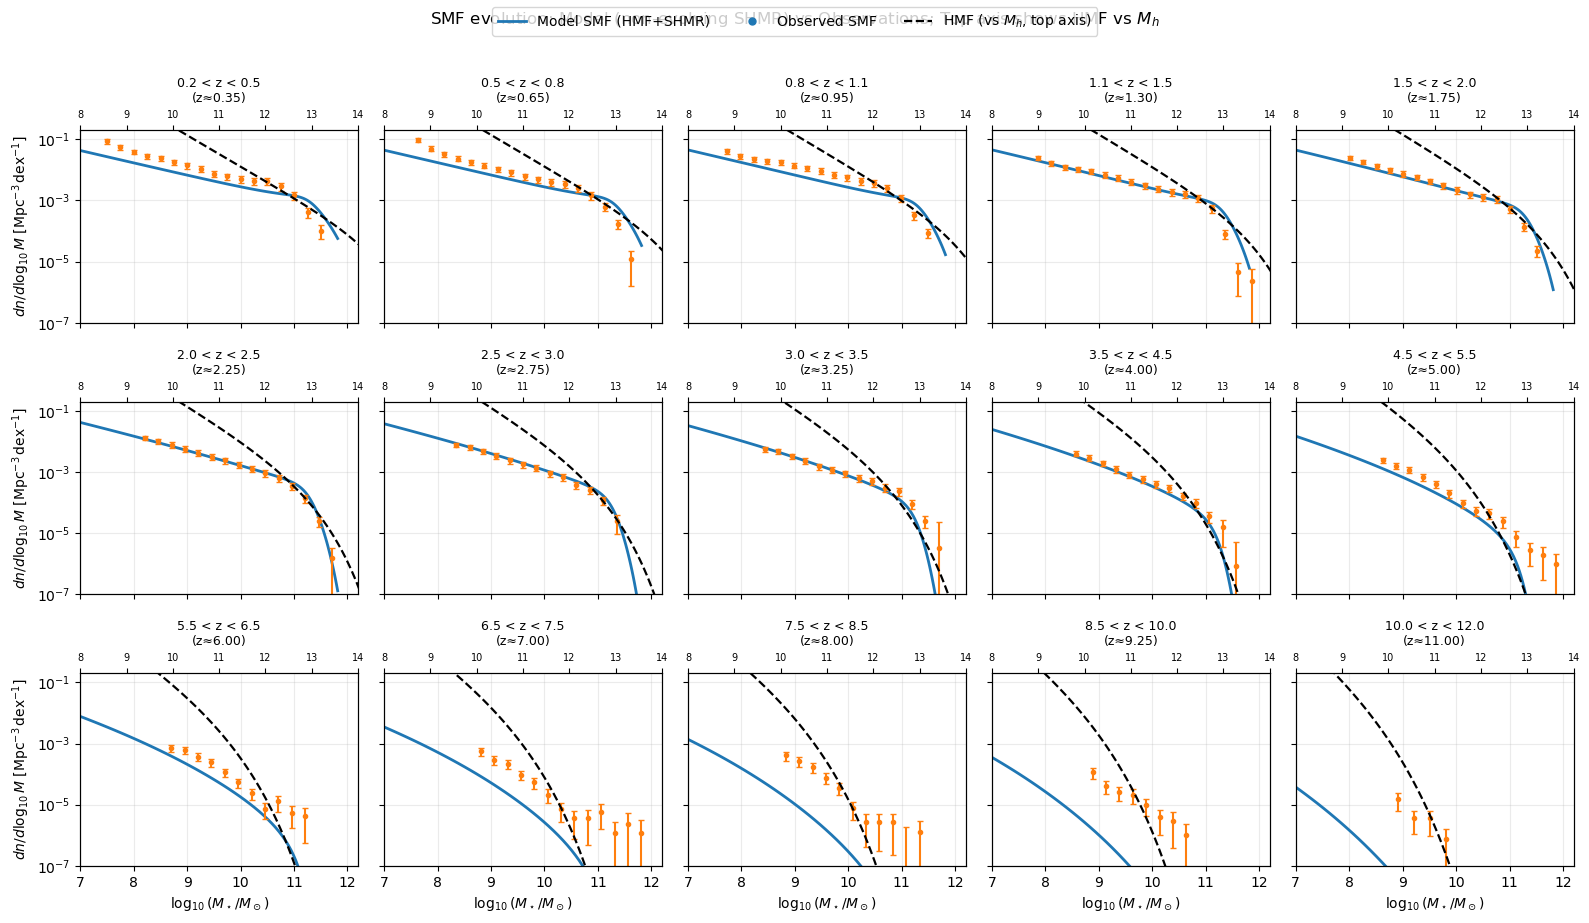

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

eps_params_best = dict(eps0=0.16, Mc=2e12, a=1.2, b=0.55)
fb = 0.156

# Panel layout
nrows, ncols = 3, 5
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 9), sharex=True, sharey=True)
axes = axes.ravel()

# consistent limits (adjust if you want)
xlim_star = (7.0, 12.2)
ylim_phi = (1e-7, 2e-1)

for i, zb in enumerate(zbins_str):
    ax = axes[i]
    zmid = zmid_from_bin(zb)

    # --- compute model curves ---
    logMh, dndlogMh, logMs_mod, Phi_mod = compute_hmf_and_smf(
        zmid, eps_params=eps_params_best, fb=fb, Mmin=8, Mmax=14, dlog10m=0.05
    )

    # --- observed data ---
    logMs_obs, Phi_obs, dPhi_obs = get_obs_bin(smf_data, zb)

    # --- plot SMF model and observations on bottom axis (Mstar) ---
    ax.semilogy(logMs_mod, Phi_mod, lw=2.0, label="Model SMF")
    ax.errorbar(logMs_obs, Phi_obs, yerr=dPhi_obs, fmt='o', ms=3, capsize=2, label="Observed")

    ax.set_title(f"{zb}\n(z≈{zmid:.2f})", fontsize=9)
    ax.set_xlim(*xlim_star)
    ax.set_ylim(*ylim_phi)
    ax.grid(True, alpha=0.25)

    # --- top axis for HMF vs halo mass ---
    ax_top = ax.twiny()
    ax_top.semilogy(logMh, dndlogMh, '--', color='k', lw=1.6)

    # match y-limits so it overlays correctly
    ax_top.set_ylim(*ylim_phi)

    # set top axis ticks as halo mass
    ax_top.set_xlim(8.0, 14.0)
    ax_top.tick_params(axis='x', labelsize=7)

# axis labels
for ax in axes[ncols*(nrows-1):]:
    ax.set_xlabel(r"$\log_{10}(M_\star/M_\odot)$")
for ax in axes[::ncols]:
    ax.set_ylabel(r"$dn/d\log_{10}M\ [\mathrm{Mpc^{-3}\,dex^{-1}}]$")

mask_mod = (np.isfinite(logMs_mod) & np.isfinite(Phi_mod) & (Phi_mod > 0) &
            (logMs_mod >= 7.0) & (logMs_mod <= 12.2))
logMs_mod = logMs_mod[mask_mod]
Phi_mod   = Phi_mod[mask_mod]

mask_hmf = np.isfinite(logMh) & np.isfinite(dndlogMh) & (dndlogMh > 0)
logMh = logMh[mask_hmf]
dndlogMh = dndlogMh[mask_hmf]

# global top label
fig.suptitle(r"SMF evolution: Model (non-evolving SHMR) vs Observations; Top axis shows HMF vs $M_h$", y=1.02)

# clean legend (single, global)
legend_handles = [
    Line2D([0],[0], color='C0', lw=2, label="Model SMF (HMF+SHMR)"),
    Line2D([0],[0], marker='o', color='C0', linestyle='None', markersize=5, label="Observed SMF"),
    Line2D([0],[0], color='k', lw=1.6, linestyle='--', label="HMF (vs $M_h$, top axis)"),
]
fig.legend(handles=legend_handles, loc='upper center', ncol=3, frameon=True)

plt.tight_layout()
plt.show()